# **Data Cleaning and Preprocessing**
**Check for missing values**

In [1]:
import pandas as pd

# Load your dataset into a pandas DataFrame
df = pd.read_csv('synthetic_handloom_data.csv',parse_dates=['Date'])

# Check for missing values
df.isna().sum ()


C:\Users\aarya\AppData\Local\Temp\ipykernel_22488\2118945111.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('synthetic_handloom_data.csv',parse_dates=['Date'])


Date                                 0
Shirting Production (Meters)         0
Suiting Production (Meters)          0
Own Production (Meters)              0
Sales (Meters)                       0
Customer Feedback Rating             0
Revenue (Rs)                         0
Cost (Rs)                            0
Profit (Rs)                          0
Inventory (Shirting Meters)          0
Inventory (Suiting Meters)           0
Inventory (Own Production Meters)    0
dtype: int64

In [2]:
# Print columns to verify the 'Date' column
print("Initial columns:", df.columns)

Initial columns: Index(['Date', 'Shirting Production (Meters)', 'Suiting Production (Meters)',
       'Own Production (Meters)', 'Sales (Meters)', 'Customer Feedback Rating',
       'Revenue (Rs)', 'Cost (Rs)', 'Profit (Rs)',
       'Inventory (Shirting Meters)', 'Inventory (Suiting Meters)',
       'Inventory (Own Production Meters)'],
      dtype='object')


In [3]:
# Ensure 'Date' column is present and correctly named
if 'Date' not in df.columns:
    print("Error: 'Date' column not found. Columns available:", df.columns)

In [4]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [5]:
# Check if there are any NaT values in the 'Date' column
if df['Date'].isna().any():
    print("Warning: Some dates could not be converted. NaT values found.")

In [6]:
df
print(df.columns)

Index(['Date', 'Shirting Production (Meters)', 'Suiting Production (Meters)',
       'Own Production (Meters)', 'Sales (Meters)', 'Customer Feedback Rating',
       'Revenue (Rs)', 'Cost (Rs)', 'Profit (Rs)',
       'Inventory (Shirting Meters)', 'Inventory (Suiting Meters)',
       'Inventory (Own Production Meters)'],
      dtype='object')


**Format Consistency**

In [7]:
# Example: convert 'Customer Feedback Rating' to integer
df['Customer Feedback Rating'] = df['Customer Feedback Rating'].astype(int)

print("Data types after conversion:")
print(df.dtypes)
print(df.head())

Data types after conversion:
Date                                 datetime64[ns]
Shirting Production (Meters)                float64
Suiting Production (Meters)                 float64
Own Production (Meters)                     float64
Sales (Meters)                              float64
Customer Feedback Rating                      int32
Revenue (Rs)                                float64
Cost (Rs)                                   float64
Profit (Rs)                                 float64
Inventory (Shirting Meters)                 float64
Inventory (Suiting Meters)                  float64
Inventory (Own Production Meters)           float64
dtype: object
        Date  Shirting Production (Meters)  Suiting Production (Meters)  \
0 2018-01-31                   1917.618108                  1263.805037   
1 2018-02-28                   1565.981131                   701.108792   
2 2018-03-31                   1650.670806                   906.415417   
3 2018-04-30                   14

# **Exploratory Data Analysis**
**Initial Data Exploration**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               72 non-null     datetime64[ns]
 1   Shirting Production (Meters)       72 non-null     float64       
 2   Suiting Production (Meters)        72 non-null     float64       
 3   Own Production (Meters)            72 non-null     float64       
 4   Sales (Meters)                     72 non-null     float64       
 5   Customer Feedback Rating           72 non-null     int32         
 6   Revenue (Rs)                       72 non-null     float64       
 7   Cost (Rs)                          72 non-null     float64       
 8   Profit (Rs)                        72 non-null     float64       
 9   Inventory (Shirting Meters)        72 non-null     float64       
 10  Inventory (Suiting Meters)         72 no

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Shirting Production (Meters)'}>,
        <Axes: title={'center': 'Suiting Production (Meters)'}>],
       [<Axes: title={'center': 'Own Production (Meters)'}>,
        <Axes: title={'center': 'Sales (Meters)'}>,
        <Axes: title={'center': 'Customer Feedback Rating'}>],
       [<Axes: title={'center': 'Revenue (Rs)'}>,
        <Axes: title={'center': 'Cost (Rs)'}>,
        <Axes: title={'center': 'Profit (Rs)'}>],
       [<Axes: title={'center': 'Inventory (Shirting Meters)'}>,
        <Axes: title={'center': 'Inventory (Suiting Meters)'}>,
        <Axes: title={'center': 'Inventory (Own Production Meters)'}>]],
      dtype=object)

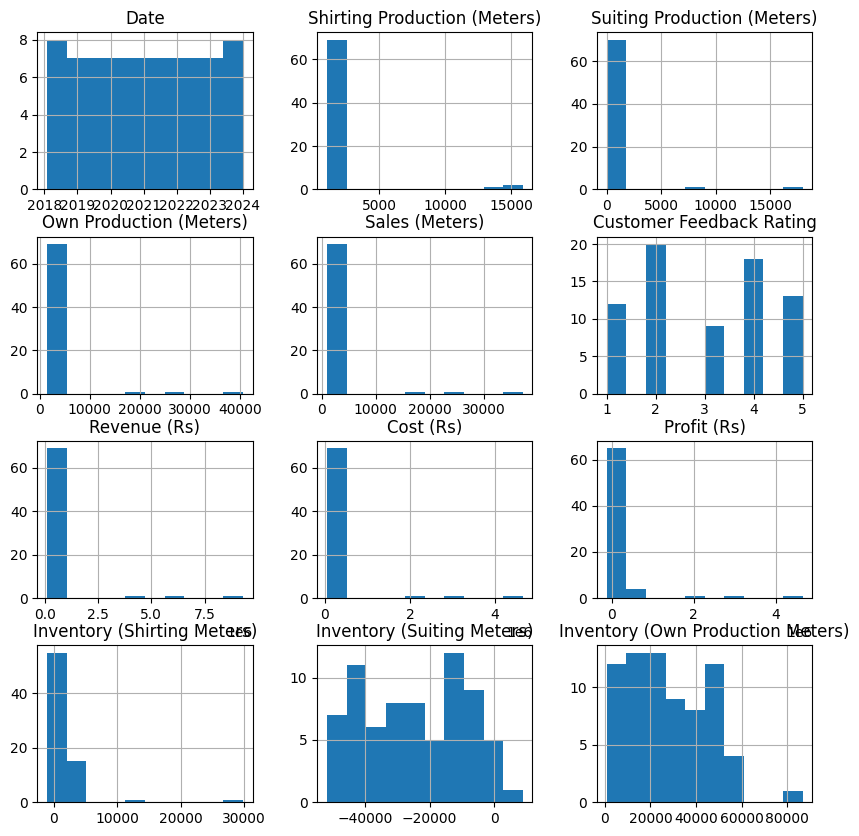

In [8]:
# Basic structure
print(df.info())

# Descriptive statistics
print(df.describe())

# Data distribution (histograms for numerical features)
df.hist(figsize=(10, 10))


**Visualize Relationships**

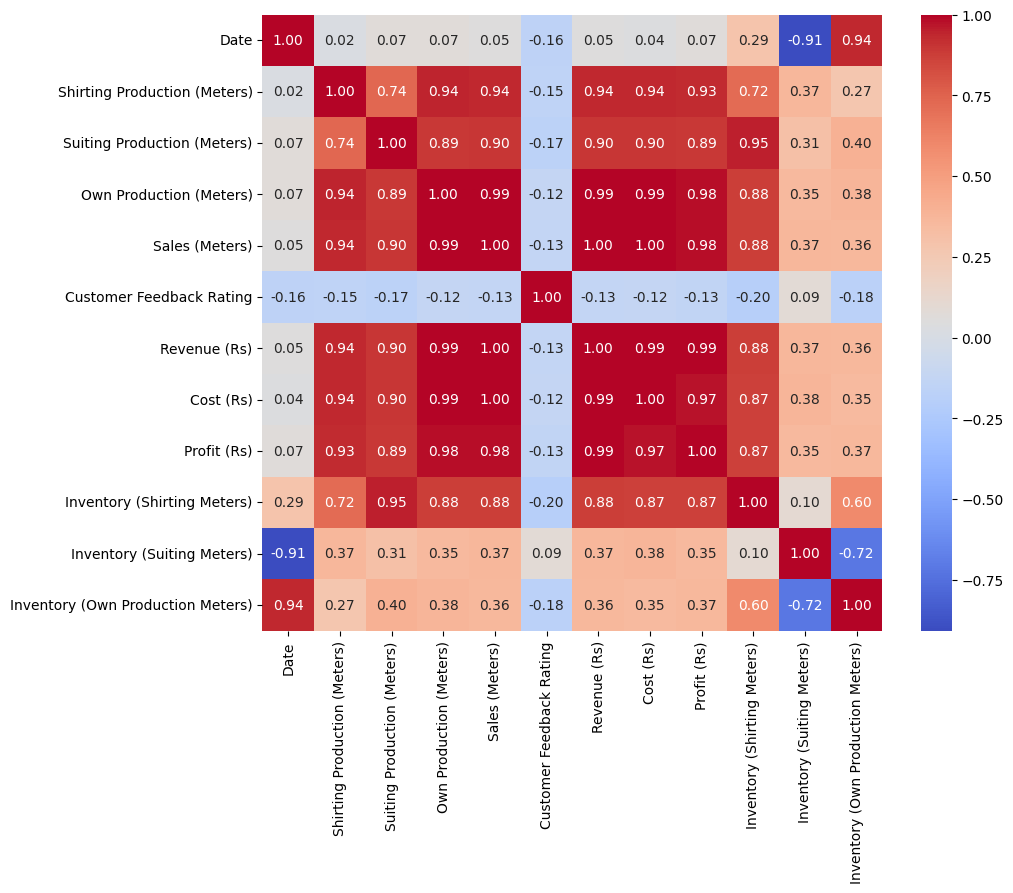

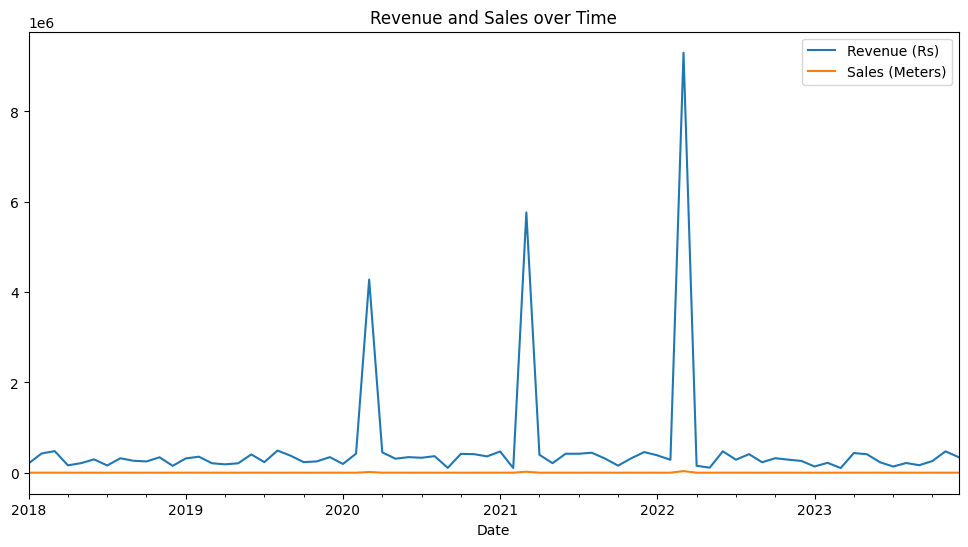

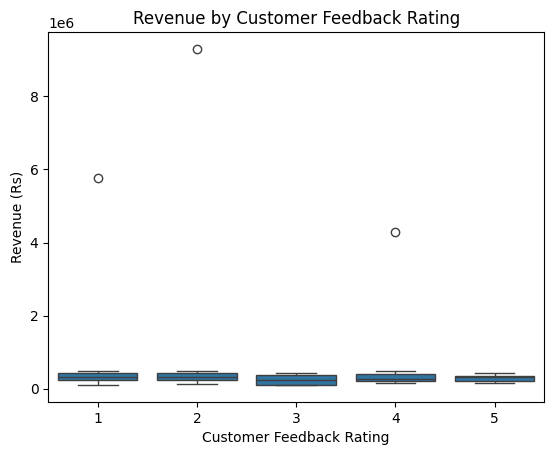

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Time series analysis (if Date column is datetime)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df[['Revenue (Rs)', 'Sales (Meters)']].plot(figsize=(12, 6))
plt.title('Revenue and Sales over Time')
plt.show()




# Comparative analysis
sns.boxplot(x='Customer Feedback Rating', y='Revenue (Rs)', data=df)
plt.title('Revenue by Customer Feedback Rating')
plt.show()


Setting threshold to solve multicollinearity

C:\Users\aarya\AppData\Local\Temp\ipykernel_22488\1394865299.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('synthetic_handloom_data.csv', parse_dates=['Date'])


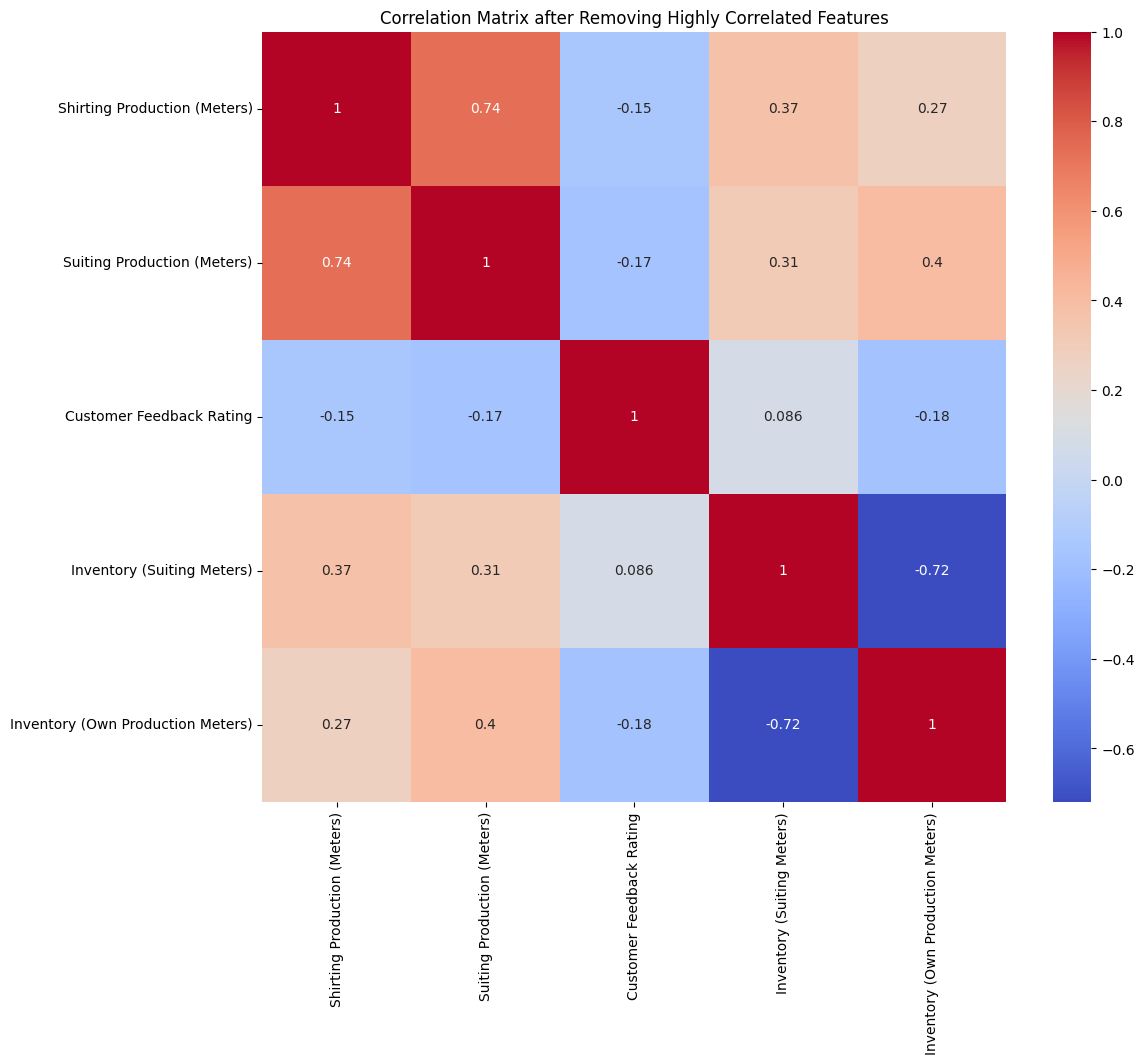

Features removed: ['Own Production (Meters)', 'Sales (Meters)', 'Revenue (Rs)', 'Cost (Rs)', 'Profit (Rs)', 'Inventory (Shirting Meters)']
Reduced DataFrame saved successfully with 'Date' included.


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
df = pd.read_csv('synthetic_handloom_data.csv', parse_dates=['Date'])

# Exclude the 'Date' column from the features for correlation analysis
features_df = df.drop(columns=['Date'])

# Calculate the correlation matrix
corr_matrix = features_df.corr().abs()

# Set the correlation threshold
threshold = 0.9

# Identify features to drop
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop the features (excluding 'Date')
reduced_features_df = features_df.drop(columns=to_drop)

# Re-add the 'Date' column to the reduced DataFrame
reduced_df = pd.concat([df[['Date']], reduced_features_df], axis=1)

# Save the reduced DataFrame to a new CSV file
reduced_df.to_csv('reduced_handloom_data.csv', index=False)

# Plot the correlation matrix for the reduced DataFrame
plt.figure(figsize=(12, 10))
sns.heatmap(reduced_features_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix after Removing Highly Correlated Features')
plt.show()

print("Features removed:", to_drop)
print("Reduced DataFrame saved successfully with 'Date' included.")


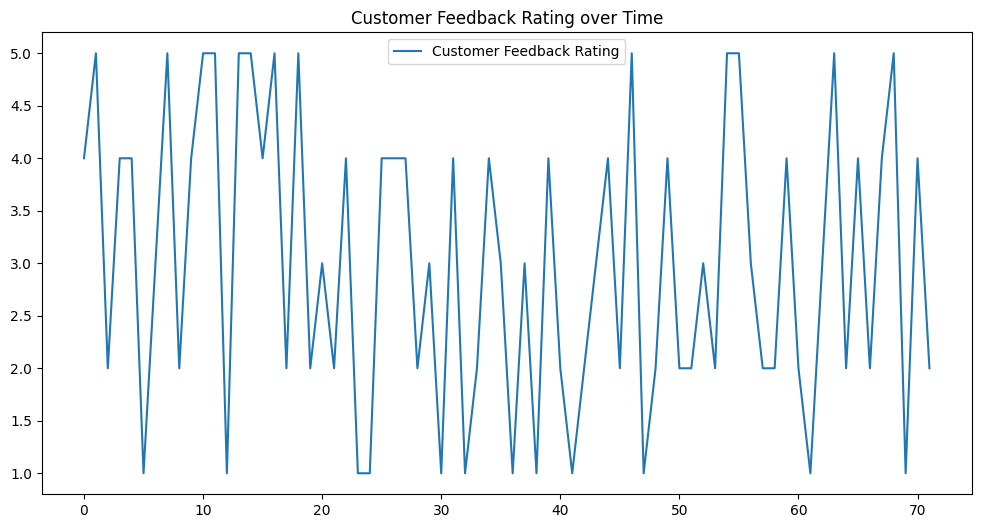

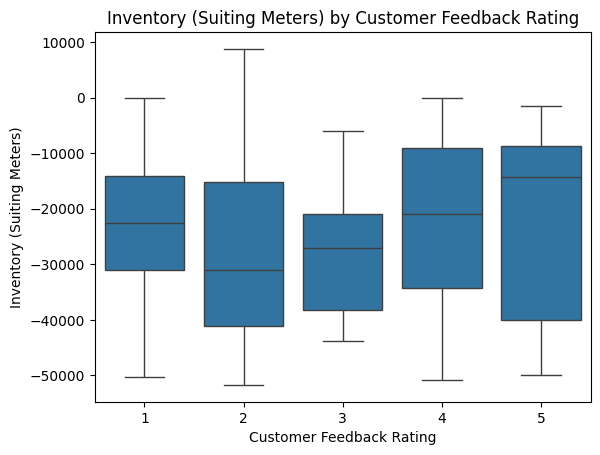

In [11]:
# Time Series Analysis with remaining feature
df[['Customer Feedback Rating']].plot(figsize=(12, 6))
plt.title('Customer Feedback Rating over Time')
plt.show()

# Boxplot for remaining features
sns.boxplot(x='Customer Feedback Rating', y='Inventory (Suiting Meters)', data=df)
plt.title('Inventory (Suiting Meters) by Customer Feedback Rating')
plt.show()

Feature Engineering

In [12]:
# Define the target variable
target = df['Inventory (Own Production Meters)']

# Define the features (dropping the target column)
features = df.drop(['Inventory (Own Production Meters)','Date'], axis=1)


Standardize the features

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define the model with the best parameters
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest Regressor MSE with optimized parameters: {rf_mse}')


Random Forest Regressor MSE with optimized parameters: 197132784.31260076


In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


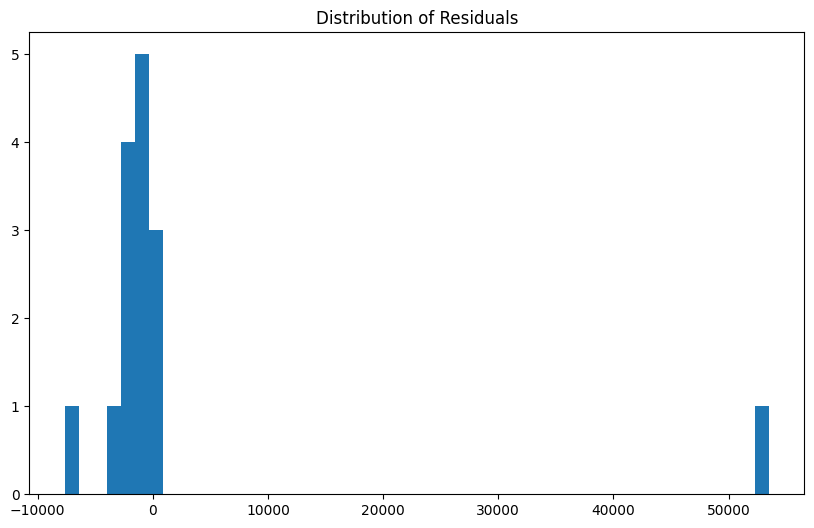

In [16]:
residuals = y_test - rf_predictions
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50)
plt.title('Distribution of Residuals')
plt.show()


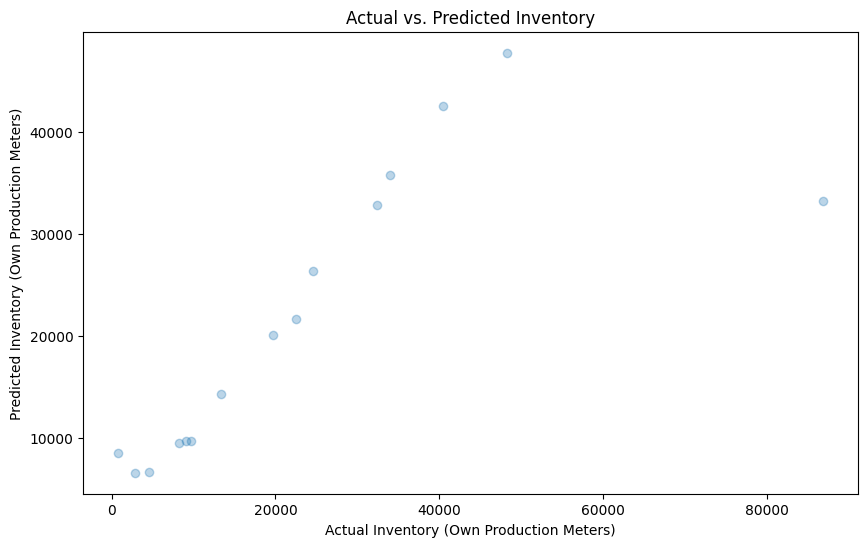

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.3)
plt.xlabel('Actual Inventory (Own Production Meters)')
plt.ylabel('Predicted Inventory (Own Production Meters)')
plt.title('Actual vs. Predicted Inventory')
plt.show()


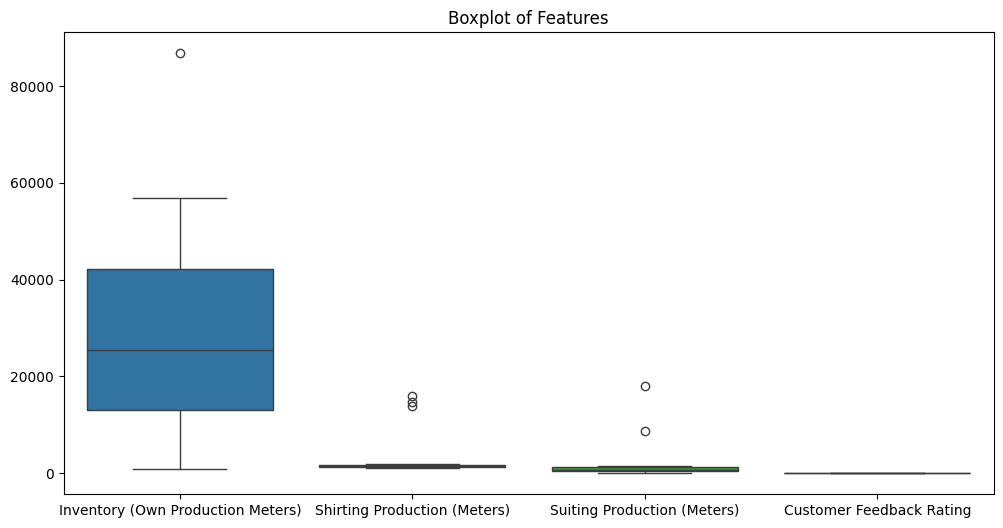

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Inventory (Own Production Meters)', 'Shirting Production (Meters)', 
                     'Suiting Production (Meters)', 'Customer Feedback Rating']])
plt.title('Boxplot of Features')
plt.show()


In [19]:
Q1 = df[['Inventory (Own Production Meters)','Suiting Production (Meters)','Shirting Production (Meters)']].quantile(0.25)
Q3 = df[['Inventory (Own Production Meters)','Suiting Production (Meters)','Shirting Production (Meters)']].quantile(0.75)
IQR = Q3 - Q1
# Define outliers based on IQR
outliers = (df[['Inventory (Own Production Meters)','Suiting Production (Meters)','Shirting Production (Meters)']] < (Q1 - 1.5 * IQR)) | (df[['Inventory (Own Production Meters)','Suiting Production (Meters)','Shirting Production (Meters)']] > (Q3 + 1.5 * IQR))


median_inventory = df[['Inventory (Own Production Meters)','Suiting Production (Meters)','Shirting Production (Meters)']].median()
df[['Inventory (Own Production Meters)','Suiting Production (Meters)','Shirting Production (Meters)']] = np.where(outliers, median_inventory, df[['Inventory (Own Production Meters)','Suiting Production (Meters)','Shirting Production (Meters)']])


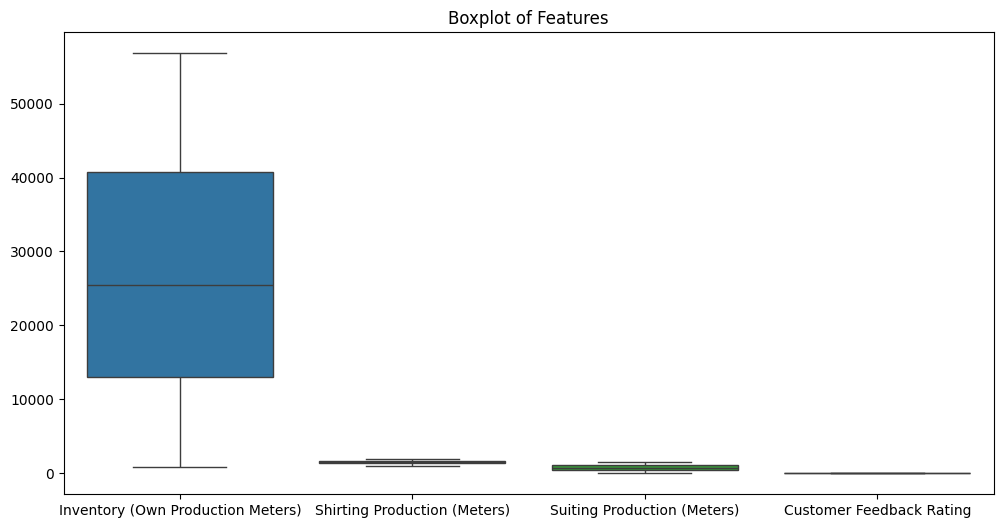

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Inventory (Own Production Meters)', 'Shirting Production (Meters)', 
                     'Suiting Production (Meters)', 'Customer Feedback Rating']])
plt.title('Boxplot of Features')
plt.show()


In [21]:
# Re-split the data
from sklearn.model_selection import train_test_split
X = df.drop(['Inventory (Own Production Meters)', 'Date'], axis=1)
y = df['Inventory (Own Production Meters)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Final Model Evaluation:

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Train models and evaluate performance
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{name} Performance:')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'R-squared: {r2:.4f}')
    print('-' * 30)

Linear Regression Performance:
Mean Squared Error: 153321136.6917
Mean Absolute Error: 4098.8768
R-squared: 0.2140
------------------------------
Decision Tree Performance:
Mean Squared Error: 47285286.7213
Mean Absolute Error: 4735.0370
R-squared: 0.7576
------------------------------
Random Forest Performance:
Mean Squared Error: 14520788.0708
Mean Absolute Error: 2363.9245
R-squared: 0.9256
------------------------------
Gradient Boosting Performance:
Mean Squared Error: 36266205.7191
Mean Absolute Error: 3309.7773
R-squared: 0.8141
------------------------------
Support Vector Regressor Performance:
Mean Squared Error: 249137543.6959
Mean Absolute Error: 13581.5561
R-squared: -0.2772
------------------------------


In [23]:
grad_model = GradientBoostingRegressor()
grad_model.fit(X_train,y_train)
y_pred = grad_model.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 3321.0537260374263
R-squared: 0.8135060493019652


Hyperparameter Tuning

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=grad_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [26]:
# Define the model with the best parameters
grad_model = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)
grad_model.fit(X_train,y_train)
y_pred = grad_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 3668.528620308767
R-squared: 0.7806022545944256


In [27]:
from joblib import dump
# Save the trained model
dump(grad_model, 'gradient_boost_model.joblib')

# Save the scaler if used
dump(scaler, 'scaler.joblib')


['scaler.joblib']

Testing the model

In [33]:
test_df=pd.read_csv('test_data_2024.csv')
df=test_df.drop(['Date','Inventory (Own Production Meters)'],axis=1)
test_df['Predictions']=grad_model.predict(df)

In [34]:
print(test_df.columns)

Index(['Date', 'Shirting Production (Meters)', 'Suiting Production (Meters)',
       'Own Production (Meters)', 'Sales (Meters)', 'Customer Feedback Rating',
       'Revenue (Rs)', 'Cost (Rs)', 'Profit (Rs)',
       'Inventory (Shirting Meters)', 'Inventory (Suiting Meters)',
       'Inventory (Own Production Meters)', 'Predictions'],
      dtype='object')


In [35]:
# Print the actual values and predictions for comparison
print(test_df[['Inventory (Own Production Meters)', 'Predictions']])


   Inventory (Own Production Meters)   Predictions
0                           57645.12  55436.626771
1                           58970.33  55746.881958
2                           60478.99  55896.587747
3                           62560.14  56544.400964
4                           64089.76  55890.769378
5                           65978.45  56132.886489
6                           67845.89  56132.886489
